In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel('car_evaluation.xlsx',header=None)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [27]:
columns=['buying','maint','doors','persons','lug_boot','safety','target']
column_map={'buying':'Buying Price','maint':'maintenance cost','doors':'Number of doors','persons':'seating capacity','lug_boot':'luggage capacity','safety':'safety','target':'class'}
data.columns=columns
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [28]:
# Assuming you have already loaded and defined your data
# Let's assume your DataFrame is called 'data'

# Define a mapping for replacement
replacement_map = {
    'vhigh': 'very high',
    'high': 'high',
    'med': 'medium',
    'low': 'low',
    '5more': '5 or more',
    'more': 'more',
    'small': 'small',
    'big': 'big',
    'unacc': 'unacceptable',
    'acc': 'acceptable',
    'vgood': 'very good',
    'good': 'good'
}

# Apply the mapping to each column
for column in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']:
    data[column] = data[column].replace(replacement_map)


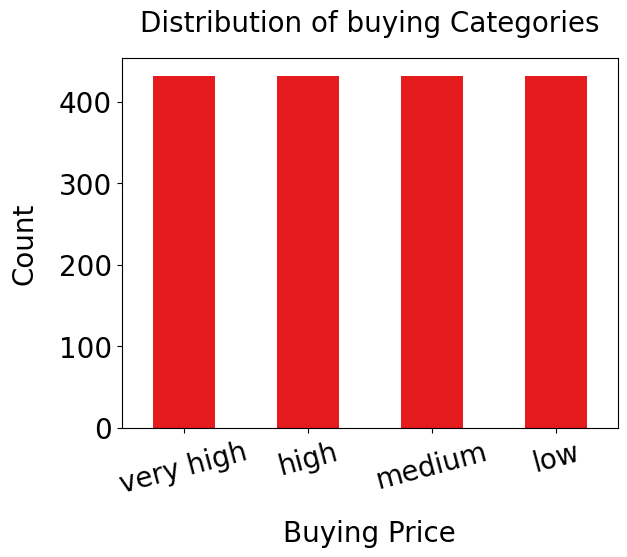

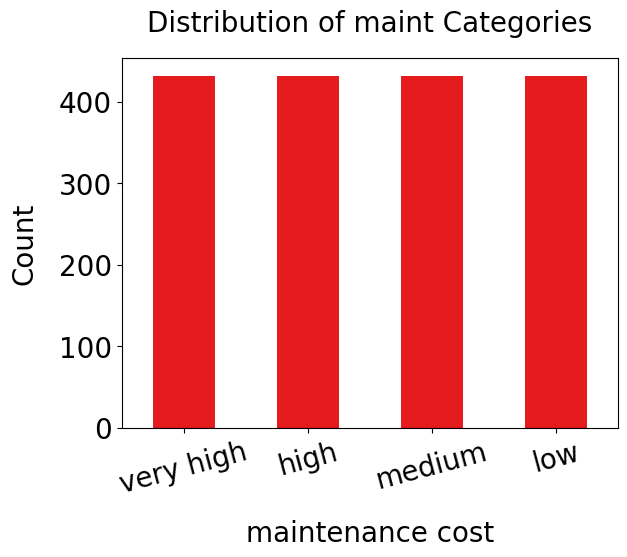

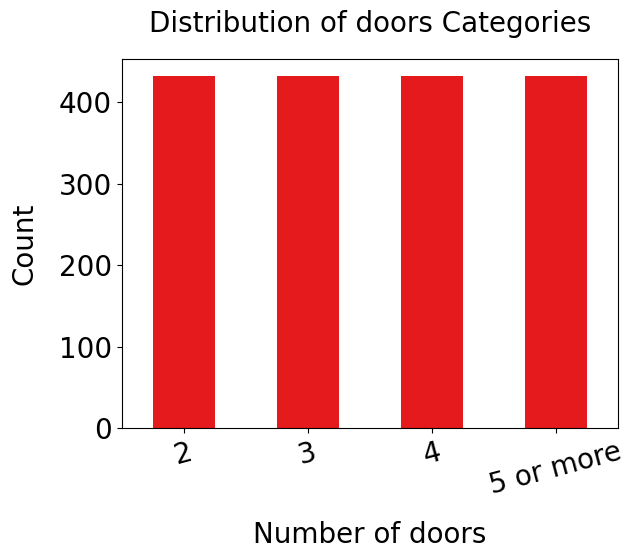

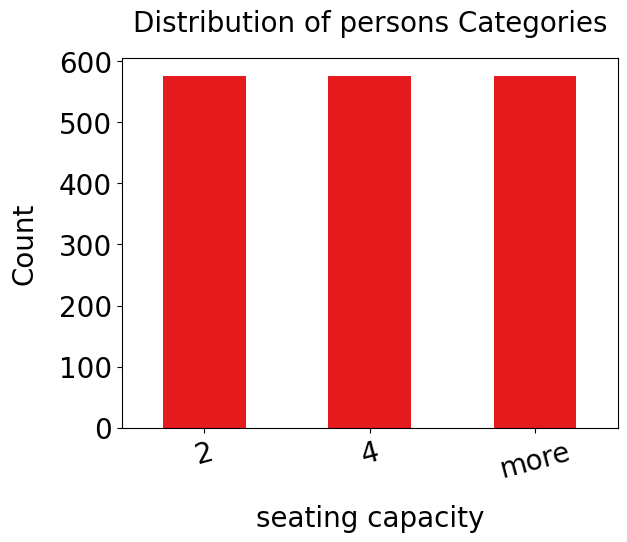

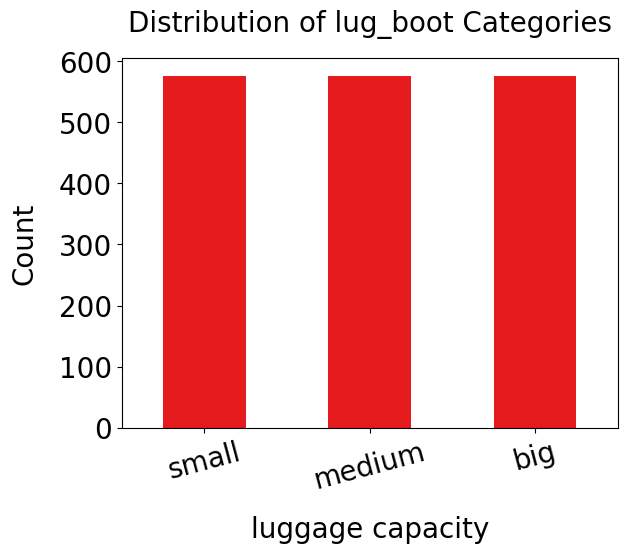

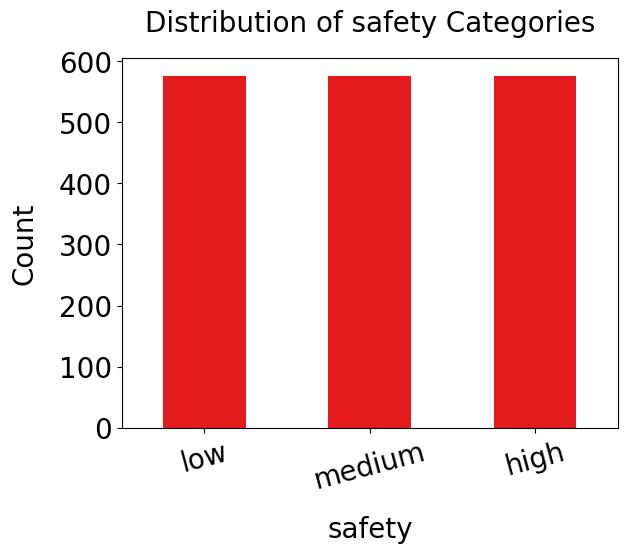

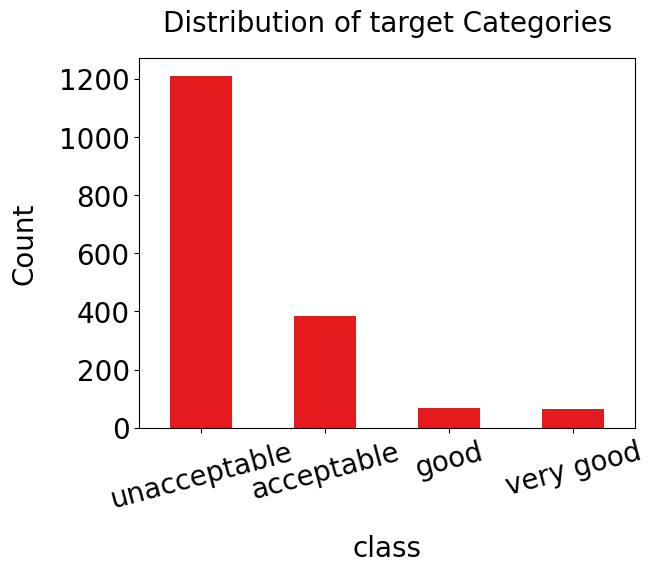

In [29]:
f=20
for column in columns:
  data[column].value_counts().plot(kind='bar')
  plt.title('Distribution of '+column+' Categories',fontsize=f,y=1.05)
  plt.xlabel(column_map[column],fontsize=f,labelpad=15)
  plt.ylabel('Count',fontsize=f,labelpad=15)
  plt.xticks(fontsize=f,rotation=15)
  plt.yticks(fontsize=f)
  plt.show()

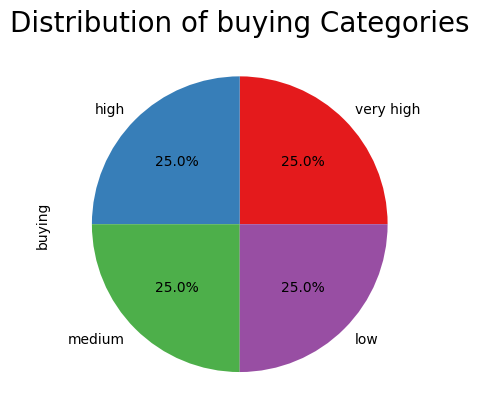

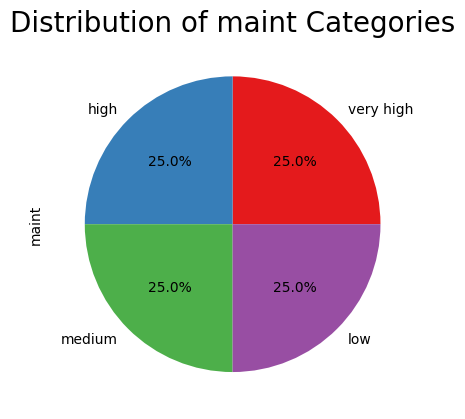

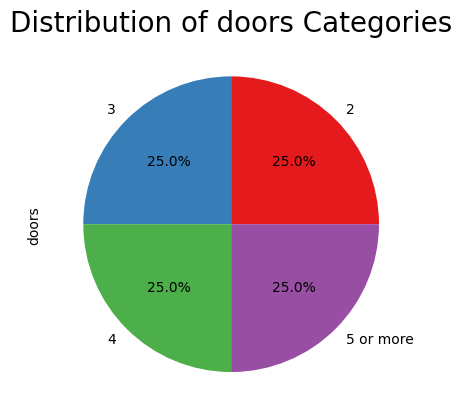

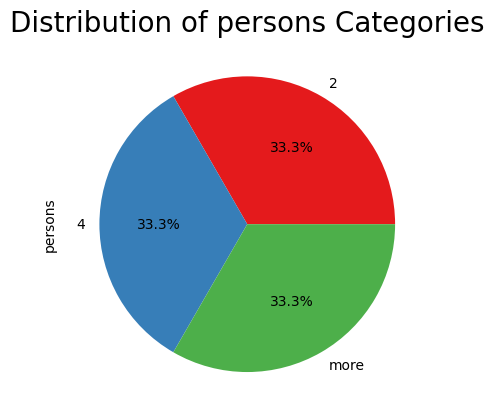

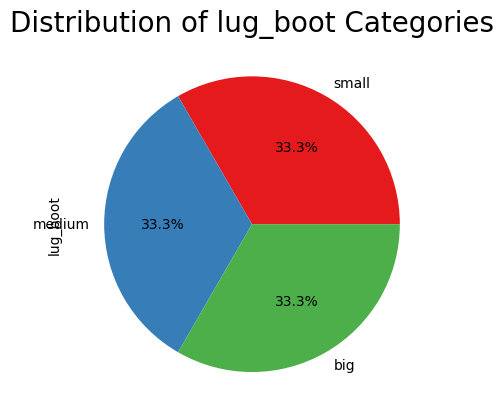

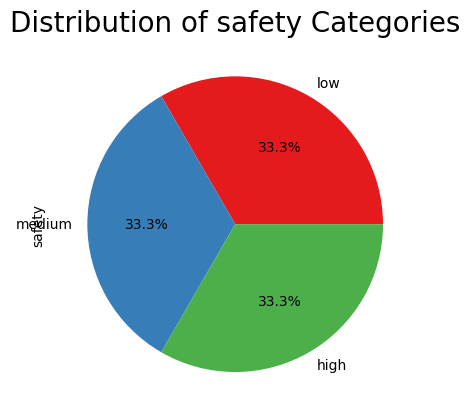

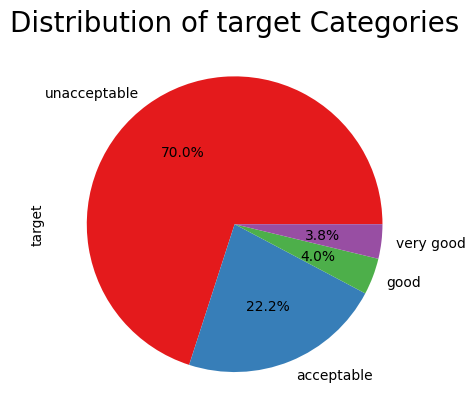

In [30]:
for column in columns:
  data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
  plt.title('Distribution of '+column+' Categories',fontsize=f)
  plt.show()

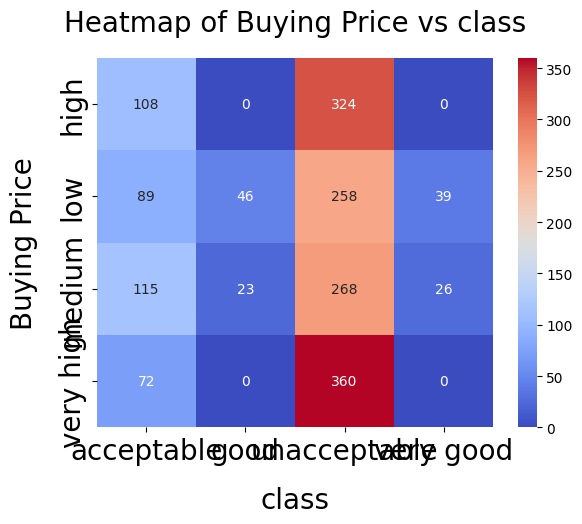

target     acceptable  good  unacceptable  very good
buying                                              
high              108     0           324          0
low                89    46           258         39
medium            115    23           268         26
very high          72     0           360          0


In [31]:
ct = pd.crosstab(data['buying'], data['target'])
sns.heatmap(ct, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of '+column_map['buying']+' vs '+column_map['target'],y=1.05,fontsize=f)
plt.xlabel(column_map['target'],labelpad=15,fontsize=f)
plt.ylabel(column_map['buying'],labelpad=15,fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.show()
print(ct)

<Figure size 800x600 with 0 Axes>

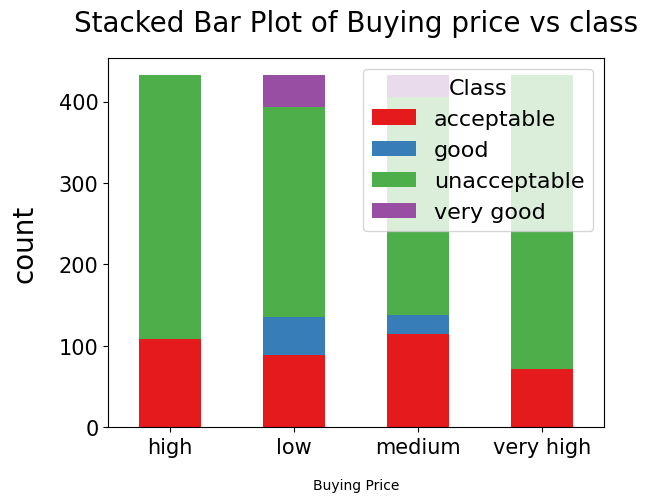

<Figure size 800x600 with 0 Axes>

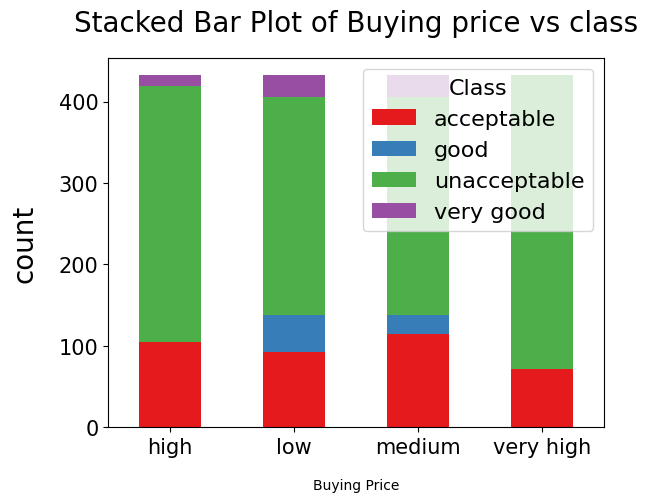

<Figure size 800x600 with 0 Axes>

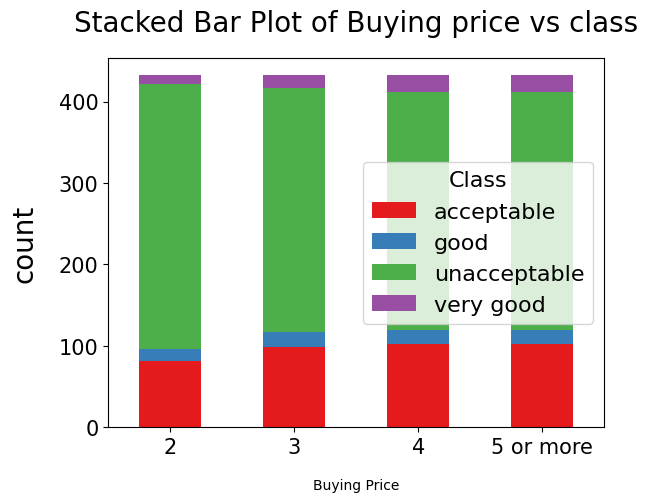

<Figure size 800x600 with 0 Axes>

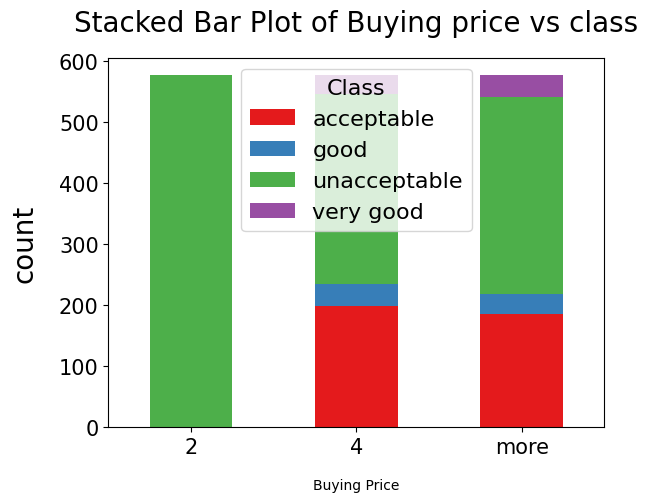

<Figure size 800x600 with 0 Axes>

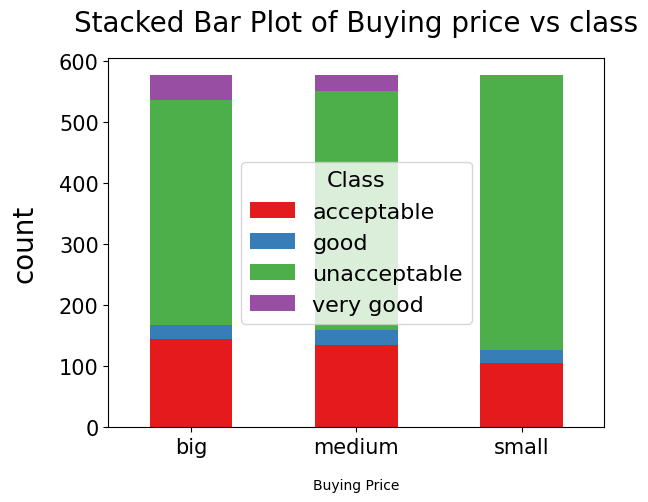

<Figure size 800x600 with 0 Axes>

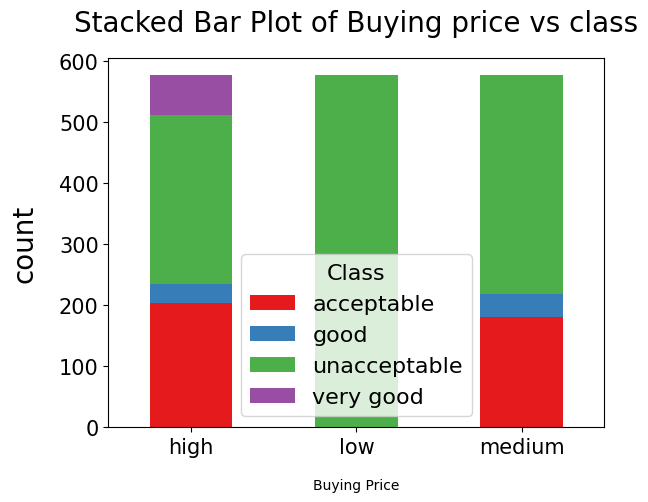

<Figure size 800x600 with 0 Axes>

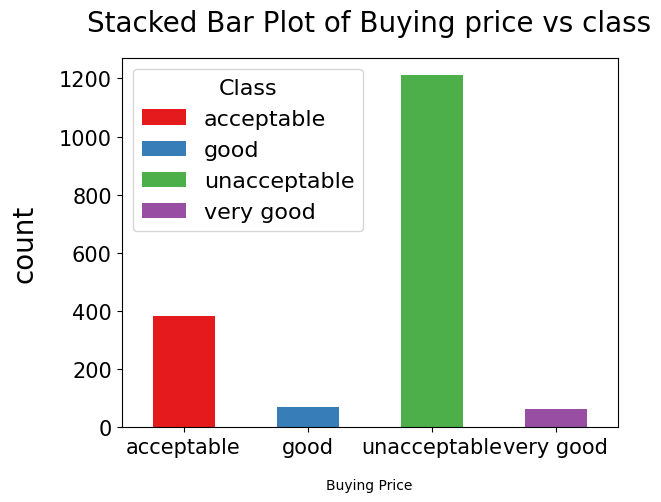

In [32]:
for column in columns:
  plt.figure(figsize=(8, 6))
  ct = pd.crosstab(data[column], data['target'])
  ct.plot(kind='bar', stacked=True)
  plt.title('Stacked Bar Plot of Buying price vs class',fontsize=f,y=1.05)
  plt.xlabel(column_map['buying'],labelpad=15)
  plt.ylabel('count',labelpad=15,fontsize=20)
  plt.xticks(fontsize=15,rotation=0)
  plt.yticks(fontsize=15)
  plt.legend(title='Class',fontsize=16,title_fontsize=16)
  plt.show()

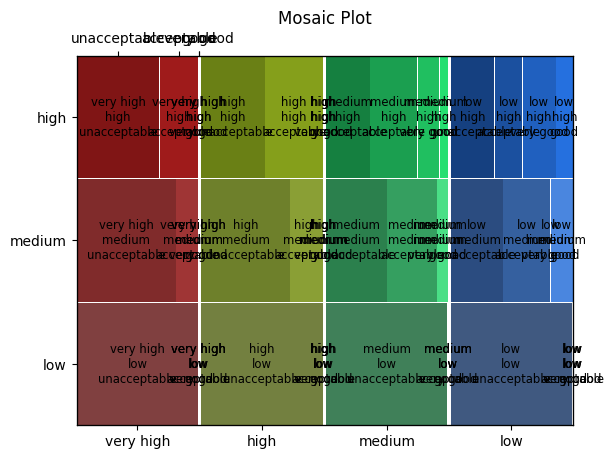

In [33]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data, ['buying', 'safety', 'target'])
plt.title('Mosaic Plot')
plt.show()

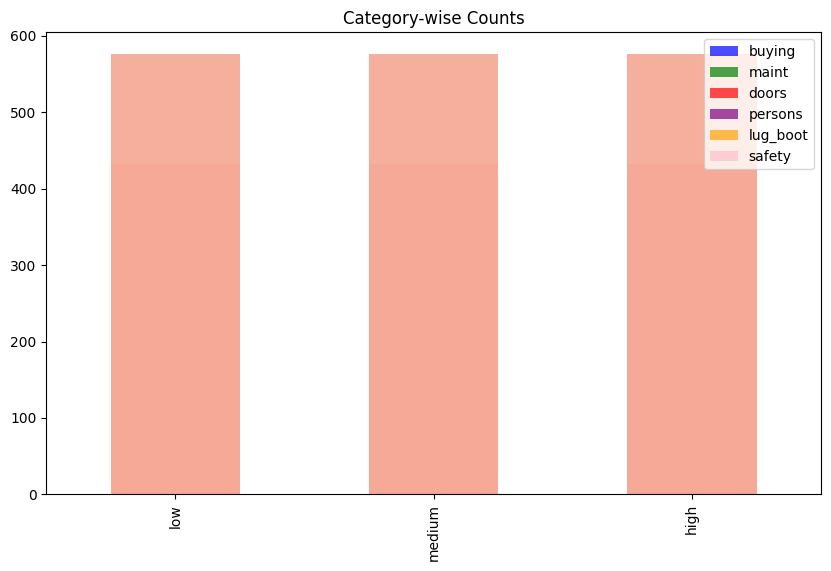

In [34]:
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']  # Add more colors as needed
for i, column in enumerate(data.columns[:-1]):
    data[column].value_counts().plot(kind='bar', alpha=0.7, color=colors[i], label=column)

plt.title('Category-wise Counts')
plt.legend()
plt.show()

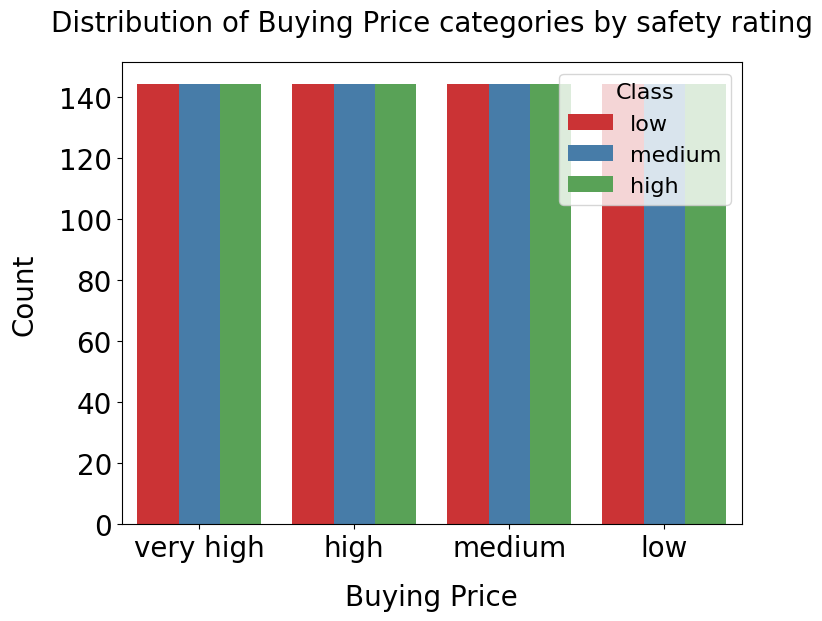

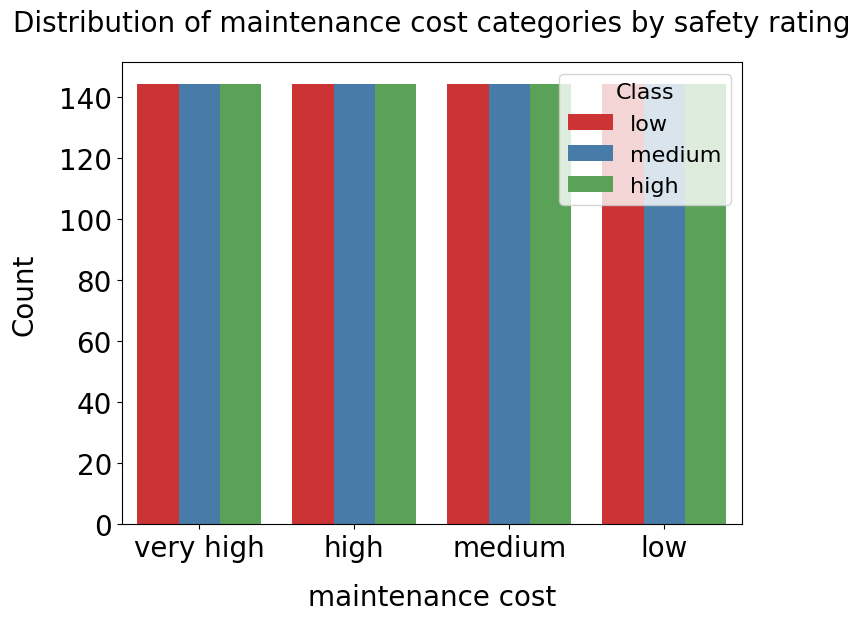

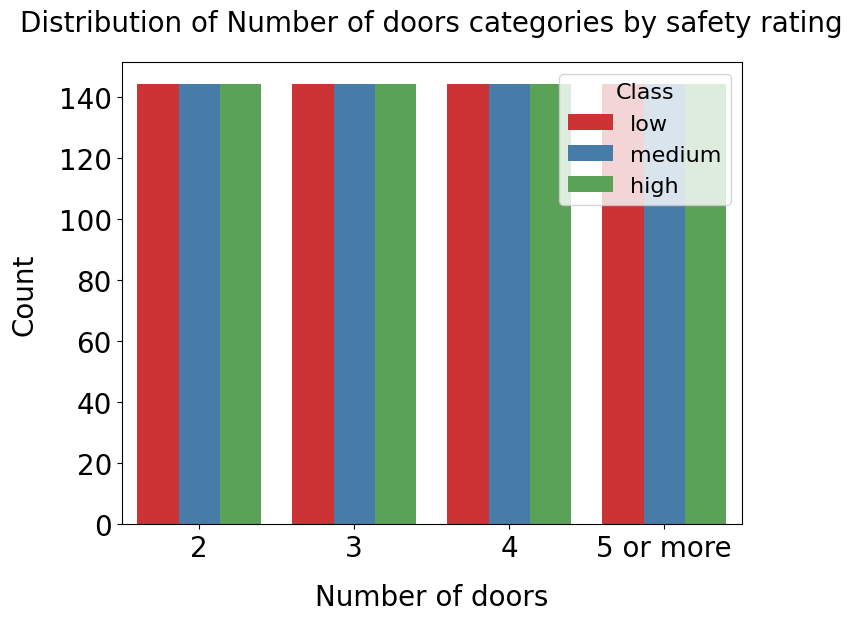

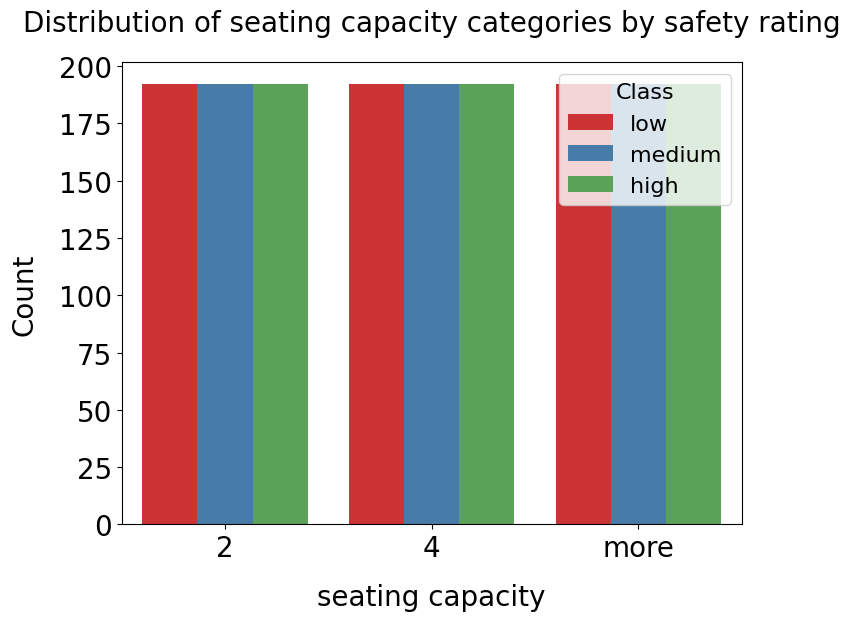

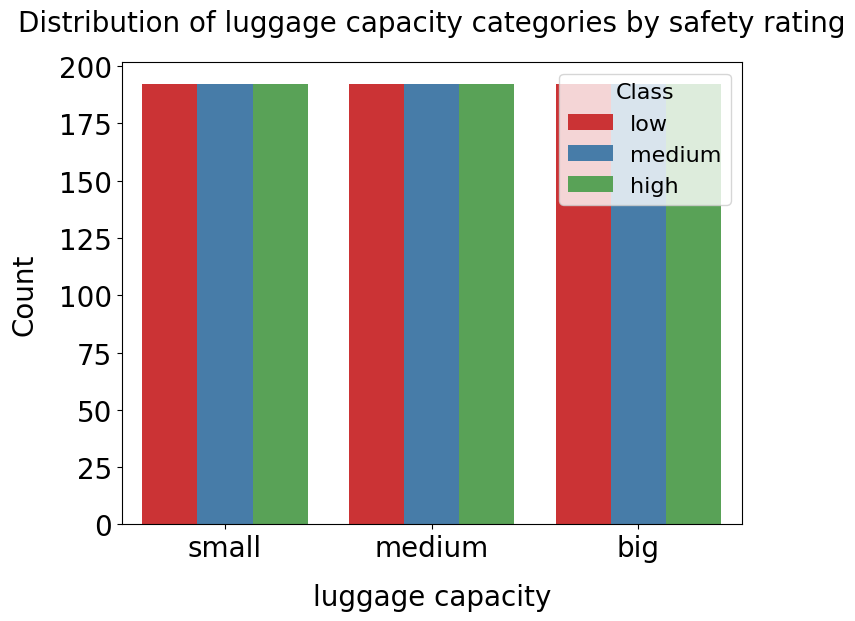

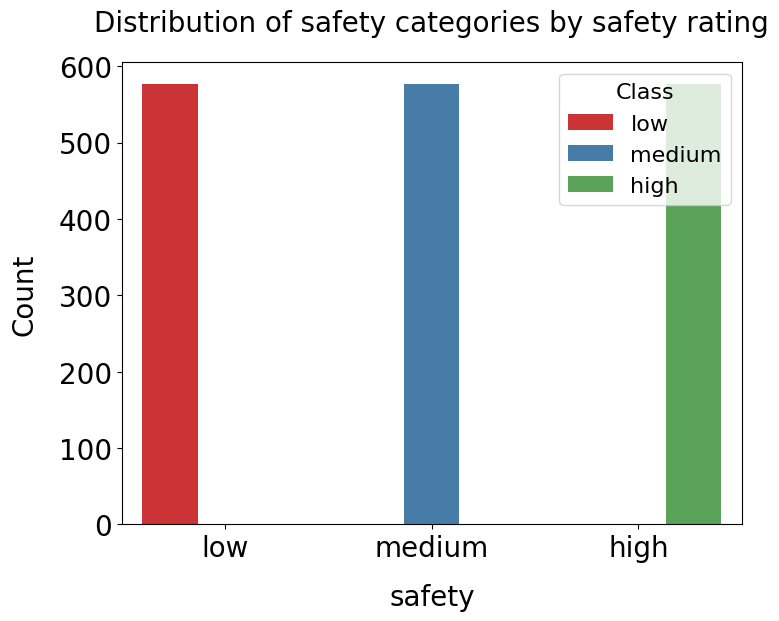

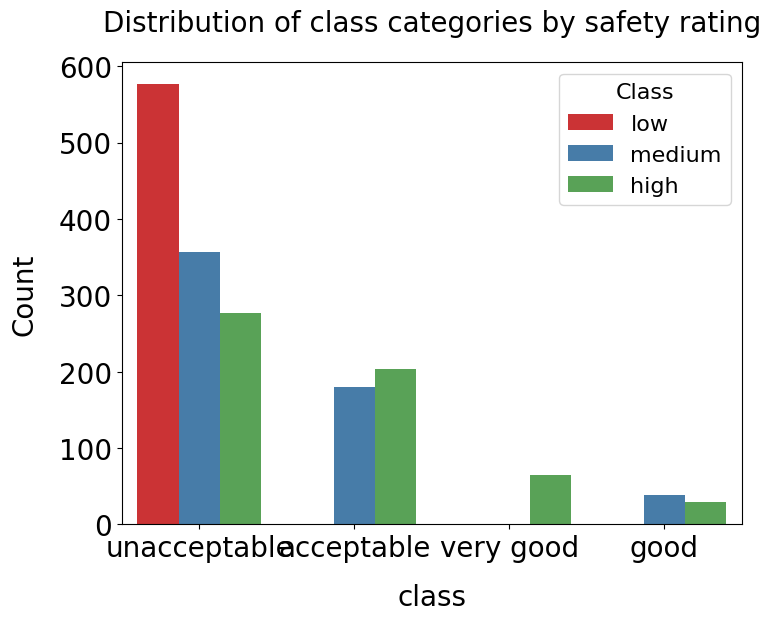

In [35]:
#custom_palette = ["#FF6F61", "#6B4226", "#D9BF77", "#5E819D", "#93C6E0"]
#sns.set_palette(custom_palette)
for column in columns:
    plt.figure(figsize=(8, 6))
    sns.set_palette("Set1")
    sns.countplot(x=column,hue='safety',data=data)
    plt.title('Distribution of ' + column_map[column] + ' categories by safety rating', fontsize=f, y=1.05)  # Adjusted title
    plt.xlabel(column_map[column],fontsize=f,labelpad=15)
    plt.ylabel('Count',fontsize=f,labelpad=15)
    plt.xticks(fontsize=f)
    plt.yticks(fontsize=f)
    plt.legend(title='Class',fontsize=16,title_fontsize=16)
    plt.show()

In [10]:
for column in columns:
  print('unique values in',column,':',data[column].unique())

unique values in buying : ['very high' 'high' 'medium' 'low']
unique values in maint : ['very high' 'high' 'medium' 'low']
unique values in doors : [2 3 4 '5 or more']
unique values in persons : [2 4 'more']
unique values in lug_boot : ['small' 'medium' 'big']
unique values in safety : ['low' 'medium' 'high']
unique values in target : ['unacceptable' 'acceptable' 'very good' 'good']


In [39]:
for column in columns:
    data[column] = data[column].astype('category').cat.codes

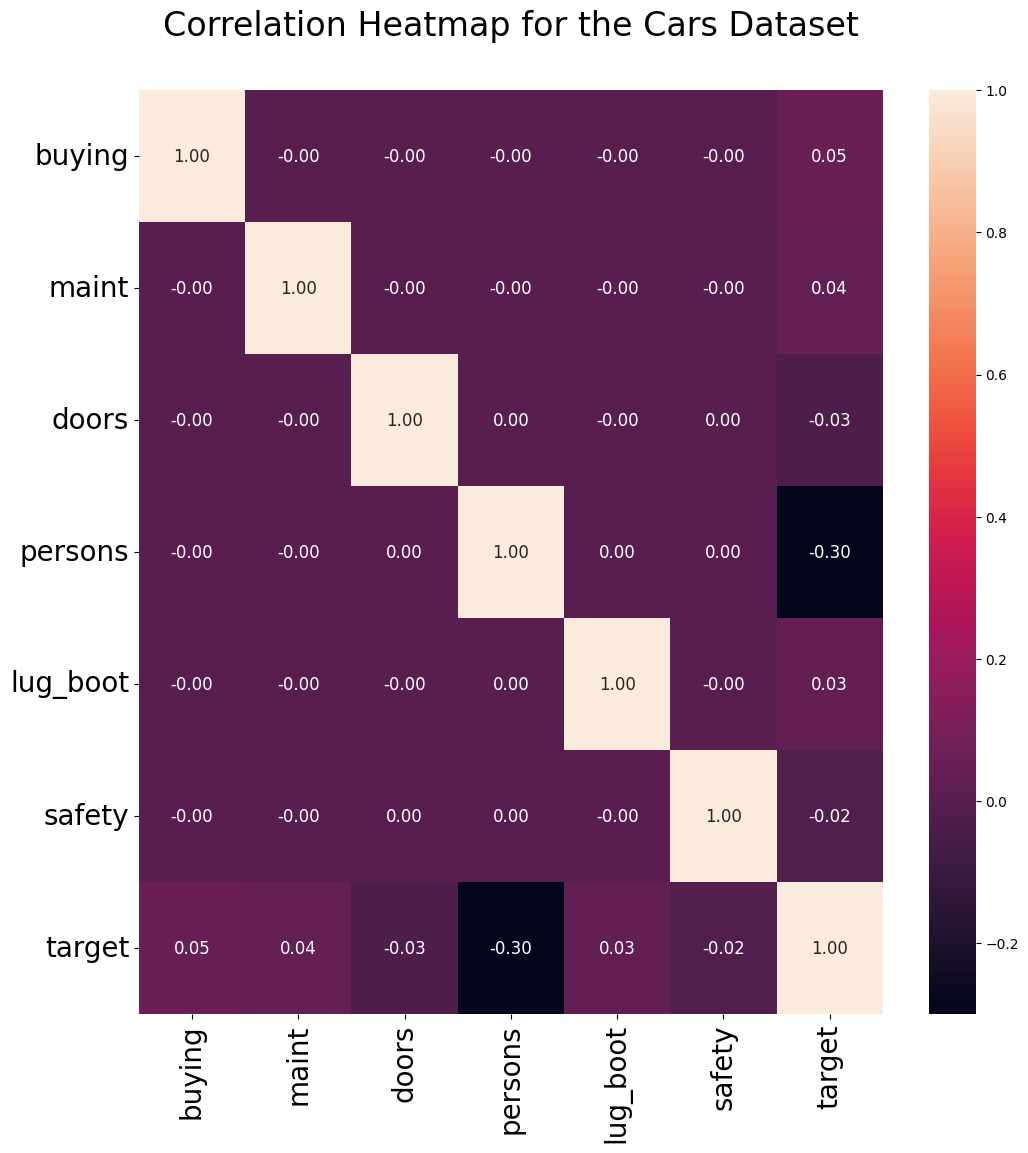

In [40]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap for the Cars Dataset', size = 24,y=1.05)
plt.xticks(rotation = 90, size = 20)
plt.yticks(rotation = 0, size = 20)
plt.show()

In [41]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
# Create the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9692307692307692
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        59
           1       0.64      0.90      0.75        10
           2       0.99      1.00      1.00       180
           3       1.00      0.91      0.95        11

    accuracy                           0.97       260
   macro avg       0.90      0.93      0.91       260
weighted avg       0.97      0.97      0.97       260



In [43]:
from sklearn.metrics import accuracy_score, f1_score
print('F1 Score: ', f1_score(y_pred, y_test, average='macro'))

F1 Score:  0.9073588576704921


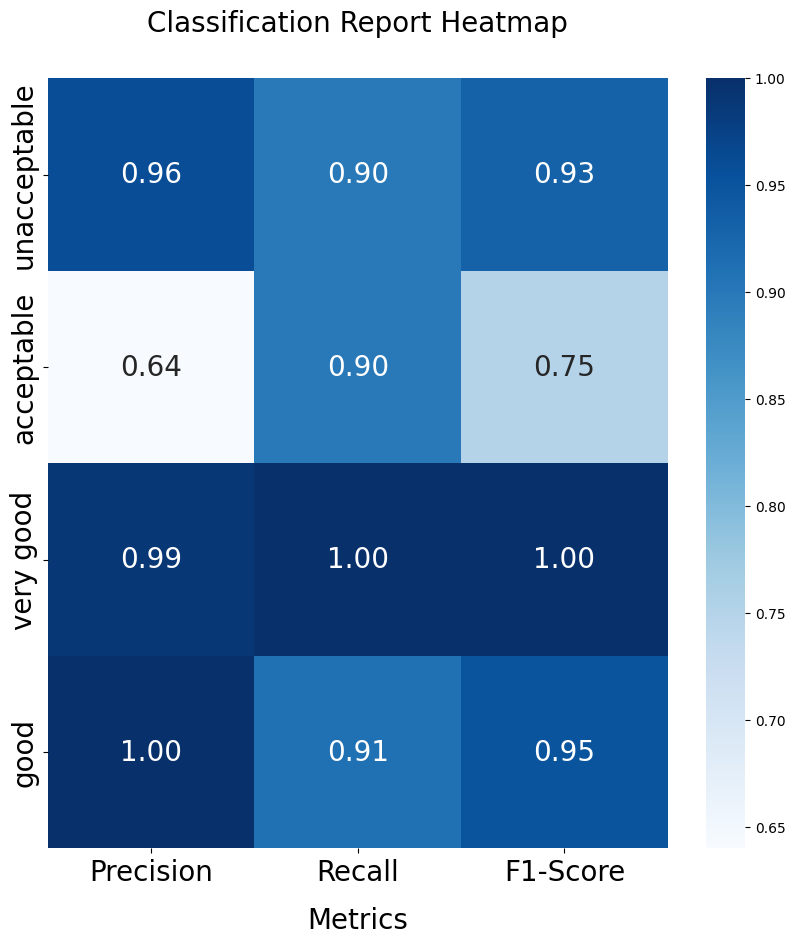

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each class
class_names = ['unacceptable', 'acceptable', 'very good', 'good']
metrics = np.array([[0.96, 0.90, 0.93],
                    [0.64, 0.90, 0.75],
                    [0.99, 1.00, 1.00],
                    [1.00, 0.91, 0.95]])

# Create a DataFrame
df = pd.DataFrame(metrics, columns=['Precision', 'Recall', 'F1-Score'], index=class_names)

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df, annot=True, fmt=".2f", cmap='Blues', cbar=True,annot_kws={"size": 20})
plt.xlabel('Metrics',fontsize=f,labelpad =15)
plt.title('Classification Report Heatmap',fontsize=f,y=1.05)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
plt.show()
